# Loan Approval Prediction using:
##### Decision Tree Classification
##### Random Forest Classification

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Importing the dataset

In [2]:
df_train = pd.read_csv("./loan_data.csv")
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Exploratory Data Analysis

### number of customers approved loan

<AxesSubplot: >

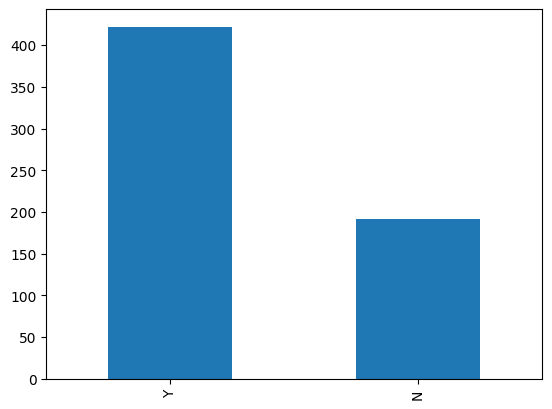

In [5]:
df_train['Loan_Status'].value_counts().plot.bar()

### applicants with property in various areas

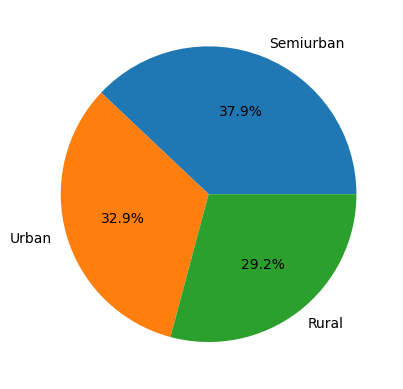

In [6]:
area = df_train['Property_Area'].value_counts()
plt.pie(area, labels=area.index, autopct='%1.1f%%')
plt.show()

### loan status according to property area

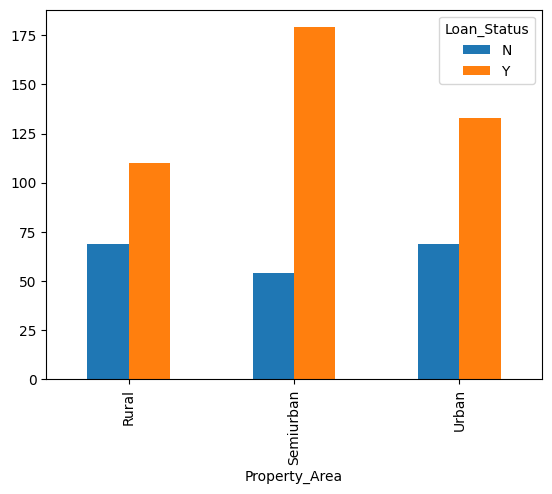

In [7]:
cb = pd.crosstab(df_train['Property_Area'], df_train['Loan_Status'])
cb.plot.bar(stacked=False)
plt.show()

### loan amount from certain property area and loan status

<AxesSubplot: xlabel='Property_Area', ylabel='LoanAmount'>

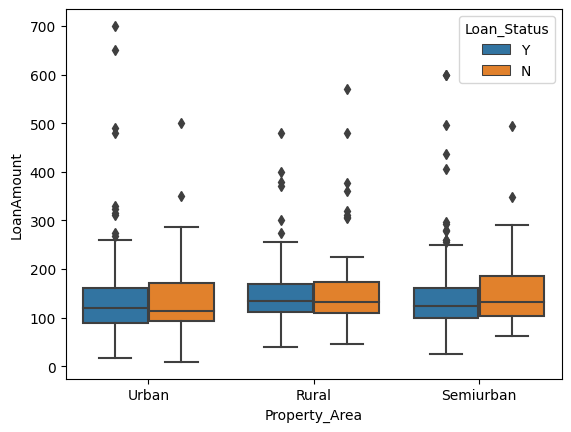

In [8]:
sns.boxplot(x="Property_Area", y="LoanAmount", hue='Loan_Status', data=df_train)

### loan amount and marital status, with loan status

<AxesSubplot: xlabel='Married', ylabel='LoanAmount'>

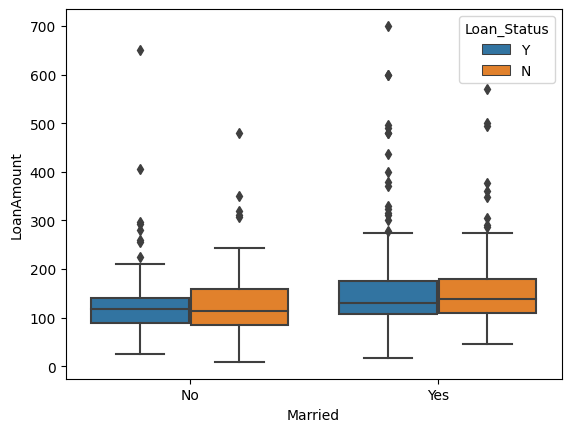

In [9]:
sns.boxplot(x="Married", y="LoanAmount", hue='Loan_Status', data=df_train)

### loan amount and number of dependents, with loan status

<AxesSubplot: xlabel='Dependents', ylabel='LoanAmount'>

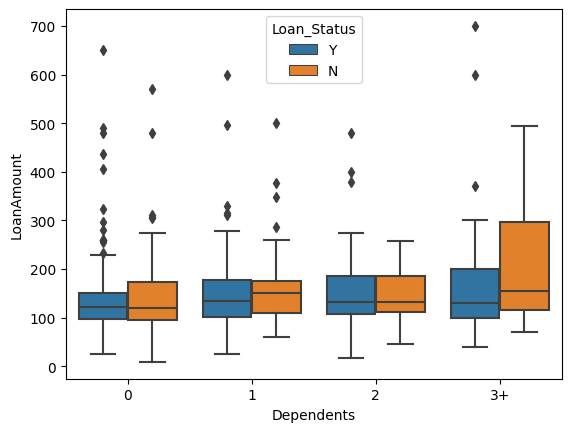

In [10]:
sns.boxplot(x="Dependents", y="LoanAmount", hue='Loan_Status', data=df_train)

### loan amount and education status, with loan status

<AxesSubplot: xlabel='Education', ylabel='LoanAmount'>

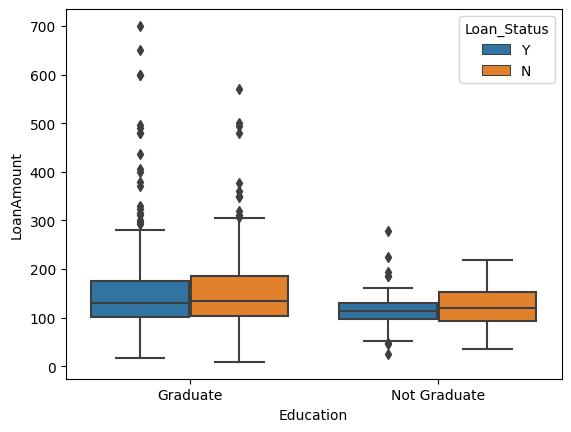

In [11]:
sns.boxplot(x="Education", y="LoanAmount", hue='Loan_Status', data=df_train)

### loan amount by the person who is self-employed or not, with loan status

<AxesSubplot: xlabel='Self_Employed', ylabel='LoanAmount'>

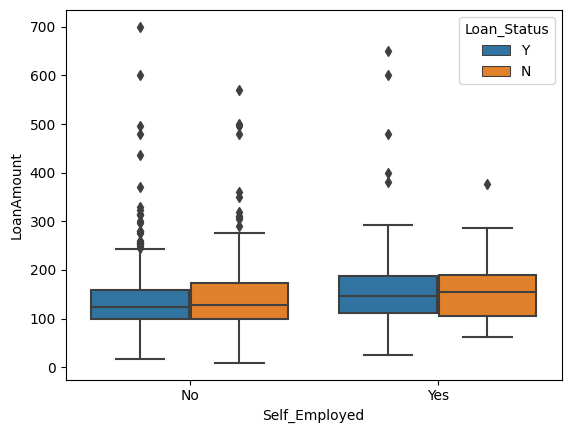

In [12]:
sns.boxplot(x="Self_Employed", y="LoanAmount", hue='Loan_Status', data=df_train)

### loan amount and credit history, with loan status

<AxesSubplot: xlabel='Credit_History', ylabel='LoanAmount'>

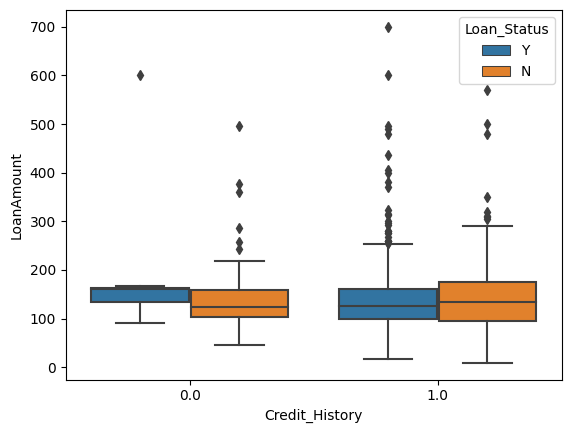

In [13]:
sns.boxplot(x="Credit_History", y="LoanAmount", hue='Loan_Status', data=df_train)

### loan amount and applicant income, with loan status

<AxesSubplot: xlabel='ApplicantIncome', ylabel='LoanAmount'>

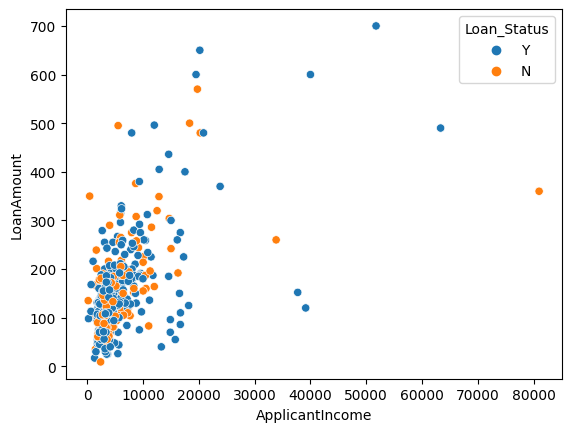

In [14]:
sns.scatterplot(x="ApplicantIncome", y="LoanAmount", hue='Loan_Status', data=df_train)


### loan amount and co-applicant income, with loan status

<AxesSubplot: xlabel='CoapplicantIncome', ylabel='LoanAmount'>

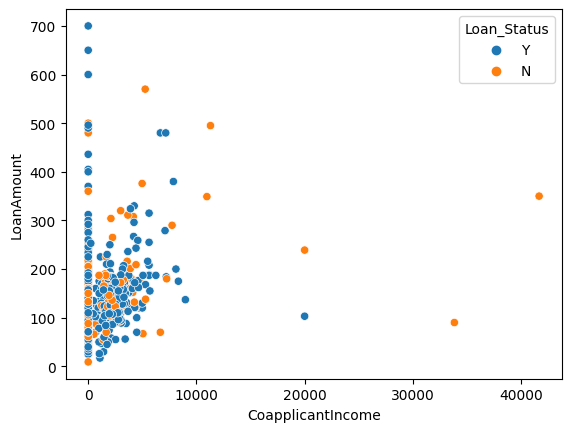

In [15]:
sns.scatterplot(x="CoapplicantIncome", y="LoanAmount", hue='Loan_Status', data=df_train)

## Split categorical columns and numerical columns

### categorical columns

In [16]:
train_cat = df_train.copy()
train_cat = train_cat.drop(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [17]:
train_cat.isnull().sum().sort_values(ascending=False)

Credit_History    50
Self_Employed     32
Dependents        15
Gender            13
Married            3
Education          0
Property_Area      0
Loan_Status        0
dtype: int64

In [18]:
train_cat.fillna(method='ffill', inplace=True)

In [19]:
train_cat.isnull().sum().any()

False

### numerical columns

In [20]:
train_num = df_train.copy()
train_num = train_num.drop(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status'], axis=1)

In [21]:
train_num.isnull().sum().sort_values(ascending=False)

LoanAmount           22
Loan_Amount_Term     14
ApplicantIncome       0
CoapplicantIncome     0
dtype: int64

In [22]:
train_num.fillna(method='bfill', inplace=True)

In [23]:
train_num.isnull().sum().any()

False

## Merge categorical columns and numerical columns

In [24]:
df = pd.concat([train_cat, train_num], axis=1)

## Label encoding data

In [25]:
labelencoder = LabelEncoder()
column_objects = [col for col in df.columns if df[col].dtypes == 'object']
df[column_objects] = df[column_objects].apply(labelencoder.fit_transform)

## Training the model

### Splitting into dependent and independent variable vectors

In [26]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Splitting training and testing data

In [27]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=13)

## Decision Tree Classification model

In [28]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
predict_test_dtc = decision_tree.predict(X_test)
accuracy_score(y_test, predict_test_dtc)

0.7513513513513513

## Random Forest Classification model

In [30]:
random_forest = RandomForestClassifier(n_estimators=300)
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [31]:
predict_test_rfc = random_forest.predict(X_test)
accuracy_score(y_test, predict_test_rfc)

0.8756756756756757